0.0016883454285976374


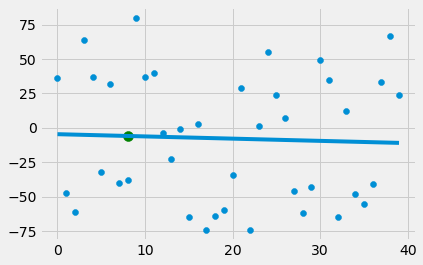

In [14]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use("fivethirtyeight")

# xs = np.array([1,2,3,4,5,6], dtype = np.float64)
# ys = np.array([5,4,6,5,6,7], dtype = np.float64)

def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val += step
        elif correlation and correlation == "neg":
            val -= step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs)*mean(ys)) - mean(xs*ys)) /
        ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    b = ( (mean(ys)) - (m*mean(xs))  )
    
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)


xs, ys = create_dataset(40, 80, 2, "False")



m,b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x) + b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x, predict_y,s = 100, c = "g")
plt.show()

In [13]:
#    K Nearest Neighbors Application 

import numpy as np
from sklearn import preprocessing, neighbors, svm
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace("?", -99999, inplace = True)
# df.drop(["id"], 1, inplace = True)

x = np.array(df.drop(["class"], 1))
y = np.array(df["class"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = svm.SVC()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(accuracy)

# example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,2,2,3,2,1]])
# example_measures = example_measures.reshape(2, -1)

# prediction = clf.predict(example_measures)
# print(prediction)

0.5357142857142857


In [3]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random


def k_nearest_neighbors(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than total voting groups")
    distances = []
    for group in data:
        for features in data[group]: 
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]     
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
#     print(vote_result, confidence)
    
    return vote_result, confidence

accuracies = []

for i in range(25): 
    df = pd.read_csv("breast-cancer-wisconsin.data")
    df.replace("?", -99999, inplace = True)
    df.drop(["id"], 1, inplace = True)
    full_data = df.astype(float).values.tolist()
    random.shuffle(full_data)

    test_size = 0.4
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k = 5)
            if group == vote:
                correct += 1
            total += 1 

#     print("Accuracy:", correct/total)
    accuracies.append(correct/total)
    
print(sum(accuracies)/len(accuracies))

0.9660215053763443


In [ ]:
# SUPPORT VECTOR MACHINE

